In [19]:
from util import load_eidc_data
metadata_file_path = 'data/catalogue_metadata.json'
texts = load_eidc_data.load_title_description_lineage(metadata_file_path)
df = load_eidc_data.load_as_df(metadata_file_path)
df['text'] = texts
df

,title,description,lineage,text
0,"Land Cover Map 2007 (25m raster, NI)",LCM2007 is a parcel-based thematic classificat...,LCM2007 uses a spatial framework based on OSNI...,"Land Cover Map 2007 (25m raster, NI)\nLCM2007 ..."
1,Land Cover Map 2021 (25m rasterised land parce...,This is a 25m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,Land Cover Map 2021 (25m rasterised land parce...
2,"Land Cover Map 2000 (vector, GB)",This dataset consists of the vector version of...,"In a major development of earlier methods, LCM...","Land Cover Map 2000 (vector, GB)\nThis dataset..."
3,"Land Cover Map 2021 (10m classified pixels, N....",This is a 10m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,"Land Cover Map 2021 (10m classified pixels, N...."
4,Telomere length data from a wild population of...,These data consist of relative telomere length...,Blood samples (~25 μl) were collected and stor...,Telomere length data from a wild population of...
...,...,...,...,...
1862,Potential evapotranspiration derived from HadU...,Gridded potential evapotranspiration calculate...,This dataset was derived from the HadUK-Grid g...,Potential evapotranspiration derived from HadU...
1863,Fine root production in human-modified forests...,This dataset includes measurements of soil res...,We assessed roots production in 20 study plots...,Fine root production in human-modified forests...
1864,Nitrous oxide fluxes and associated soil measu...,This data set includes over 500 individual flu...,Flux measurements were made using a high-preci...,Nitrous oxide fluxes and associated soil measu...
1865,A land use map of Peninsular Malaysia for the ...,Gridded land use map of Peninsular Malaysia wi...,The land use is based on detailed polygon land...,A land use map of Peninsular Malaysia for the ...


In [20]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [21]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(df['text'])

In [22]:
import numpy as np
df['embeddings'] = [np.array2string(e, separator=', ') for e in embeddings]

,title,description,lineage,text,embeddings
0,"Land Cover Map 2007 (25m raster, NI)",LCM2007 is a parcel-based thematic classificat...,LCM2007 uses a spatial framework based on OSNI...,"Land Cover Map 2007 (25m raster, NI)\nLCM2007 ...","[ 3.00886929e-02, -2.32272837e-02, 4.73208837..."
1,Land Cover Map 2021 (25m rasterised land parce...,This is a 25m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,Land Cover Map 2021 (25m rasterised land parce...,"[ 6.28311932e-02, -5.43189533e-02, 8.88470039..."
2,"Land Cover Map 2000 (vector, GB)",This dataset consists of the vector version of...,"In a major development of earlier methods, LCM...","Land Cover Map 2000 (vector, GB)\nThis dataset...","[ 4.38067913e-02, -5.05502634e-02, 8.27456191..."
3,"Land Cover Map 2021 (10m classified pixels, N....",This is a 10m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,"Land Cover Map 2021 (10m classified pixels, N....","[ 5.74965067e-02, -6.26730919e-02, 9.77758318..."
4,Telomere length data from a wild population of...,These data consist of relative telomere length...,Blood samples (~25 μl) were collected and stor...,Telomere length data from a wild population of...,"[-7.37808645e-02, 1.53175201e-02, -5.16044442..."
...,...,...,...,...,...
1862,Potential evapotranspiration derived from HadU...,Gridded potential evapotranspiration calculate...,This dataset was derived from the HadUK-Grid g...,Potential evapotranspiration derived from HadU...,"[-1.38851702e-02, 4.87656146e-02, 5.29223680..."
1863,Fine root production in human-modified forests...,This dataset includes measurements of soil res...,We assessed roots production in 20 study plots...,Fine root production in human-modified forests...,"[ 8.97369012e-02, -6.89962273e-03, 3.69518548..."
1864,Nitrous oxide fluxes and associated soil measu...,This data set includes over 500 individual flu...,Flux measurements were made using a high-preci...,Nitrous oxide fluxes and associated soil measu...,"[ 4.94133905e-02, -3.09974663e-02, 4.39932011..."
1865,A land use map of Peninsular Malaysia for the ...,Gridded land use map of Peninsular Malaysia wi...,The land use is based on detailed polygon land...,A land use map of Peninsular Malaysia for the ...,"[ 7.30811208e-02, 9.31792408e-02, 9.80782434..."


In [23]:
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
keybert_model = KeyBERTInspired()
#pos_model = PartOfSpeech('en_core_web_sm')
#mmr_model = MaximalMarginalRelevance(diversity=0.3)
#representation_model={
    #'POS': pos_model,
    #'MMR': mmr_model,
    #'KeyBERT': keybert_model
#}
vectorizer_model = CountVectorizer(stop_words='english', min_df=2, ngram_range=(1,2))
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=keybert_model,
    top_n_words=10,
    verbose=True
    )
topics, probs = topic_model.fit_transform(texts, embeddings)
topic_model.get_topic_info()


2024-06-19 08:51:50,399 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-19 08:52:09,312 - BERTopic - Dimensionality - Completed ✓
2024-06-19 08:52:09,314 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-19 08:52:09,477 - BERTopic - Cluster - Completed ✓
2024-06-19 08:52:09,485 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-19 08:52:34,353 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,531,-1_ecology_butterfly_habitat_index,"[ecology, butterfly, habitat, index, species, ...",[United Kingdom Butterfly Monitoring Scheme: s...
1,0,167,0_countryside survey_uk countryside_habitat da...,"[countryside survey, uk countryside, habitat d...",[Countryside Survey 1998 estimates of Broad Ha...
2,1,135,1_water samples_catchment_catchments_water qua...,"[water samples, catchment, catchments, water q...",[Major ion and nutrient data from rivers [LOIS...
3,2,131,2_soil samples_soils_soil_grassland,"[soil samples, soils, soil, grassland, soil co...","[ Plant biomass, soil conditions and stable is..."
4,3,116,3_tropical forest_forests_rainforest_vegetation,"[tropical forest, forests, rainforest, vegetat...",[Stem respiration in human-modified forests of...
5,4,110,4_river flow_hydrological_catchments_catchment,"[river flow, hydrological, catchments, catchme...",[ Grid-to-Grid model estimates of river flow f...
6,5,85,5_nitrogen deposition_deposition values_ammoni...,"[nitrogen deposition, deposition values, ammon...",[Deposition and concentration values for prote...
7,6,71,6_classification land_classified land_land cov...,"[classification land, classified land, land co...","[Land Cover Map 2022 (10m classified pixels, G..."
8,7,64,7_phytoplankton_water chemistry_chlorophyll_ox...,"[phytoplankton, water chemistry, chlorophyll, ...","[Surface temperature, surface oxygen, water cl..."
9,8,58,8_pollination_bees_pollinators_flowering,"[pollination, bees, pollinators, flowering, pl...",[The seed set of supplemented and pollinator e...


In [26]:
document_topics = topic_model.get_document_info(df['text'].to_list())
df['topic_number'] = document_topics['Topic'].to_list()
df['topic_keywords'] = document_topics['Representation'].to_list()
df

,title,description,lineage,text,embeddings,topic_number,topic_keywords
0,"Land Cover Map 2007 (25m raster, NI)",LCM2007 is a parcel-based thematic classificat...,LCM2007 uses a spatial framework based on OSNI...,"Land Cover Map 2007 (25m raster, NI)\nLCM2007 ...","[ 3.00886929e-02, -2.32272837e-02, 4.73208837...",16,"[lcm2000, land cover, lcm2007, classification ..."
1,Land Cover Map 2021 (25m rasterised land parce...,This is a 25m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,Land Cover Map 2021 (25m rasterised land parce...,"[ 6.28311932e-02, -5.43189533e-02, 8.88470039...",6,"[classification land, classified land, land co..."
2,"Land Cover Map 2000 (vector, GB)",This dataset consists of the vector version of...,"In a major development of earlier methods, LCM...","Land Cover Map 2000 (vector, GB)\nThis dataset...","[ 4.38067913e-02, -5.05502634e-02, 8.27456191...",16,"[lcm2000, land cover, lcm2007, classification ..."
3,"Land Cover Map 2021 (10m classified pixels, N....",This is a 10m pixel data set representing the ...,UKCEH’s automated land cover algorithms classi...,"Land Cover Map 2021 (10m classified pixels, N....","[ 5.74965067e-02, -6.26730919e-02, 9.77758318...",6,"[classification land, classified land, land co..."
4,Telomere length data from a wild population of...,These data consist of relative telomere length...,Blood samples (~25 μl) were collected and stor...,Telomere length data from a wild population of...,"[-7.37808645e-02, 1.53175201e-02, -5.16044442...",-1,"[ecology, butterfly, habitat, index, species, ..."
...,...,...,...,...,...,...,...
1862,Potential evapotranspiration derived from HadU...,Gridded potential evapotranspiration calculate...,This dataset was derived from the HadUK-Grid g...,Potential evapotranspiration derived from HadU...,"[-1.38851702e-02, 4.87656146e-02, 5.29223680...",17,"[climate hydrology, meteorological, areal rain..."
1863,Fine root production in human-modified forests...,This dataset includes measurements of soil res...,We assessed roots production in 20 study plots...,Fine root production in human-modified forests...,"[ 8.97369012e-02, -6.89962273e-03, 3.69518548...",3,"[tropical forest, forests, rainforest, vegetat..."
1864,Nitrous oxide fluxes and associated soil measu...,This data set includes over 500 individual flu...,Flux measurements were made using a high-preci...,Nitrous oxide fluxes and associated soil measu...,"[ 4.94133905e-02, -3.09974663e-02, 4.39932011...",-1,"[ecology, butterfly, habitat, index, species, ..."
1865,A land use map of Peninsular Malaysia for the ...,Gridded land use map of Peninsular Malaysia wi...,The land use is based on detailed polygon land...,A land use map of Peninsular Malaysia for the ...,"[ 7.30811208e-02, 9.31792408e-02, 9.80782434...",4,"[river flow, hydrological, catchments, catchme..."


In [10]:
# save reduced embeddings to csv
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)
df['umap_reduced'] = [np.array2string(e, separator=', ') for e in reduced_embeddings]
df.to_csv('eidc_embeddings.csv')

In [11]:
df

,Topic,Name,Probability,document_title,embedding_component_one,embedding_component_two
0,16,16_lcm2000_land cover_lcm2007_classification s...,1.000000,"Land Cover Map 2007 (25m raster, NI)",-5.937577,8.222505
1,6,6_classification land_classified land_land cov...,1.000000,Land Cover Map 2021 (25m rasterised land parce...,8.206237,2.264367
2,16,16_lcm2000_land cover_lcm2007_classification s...,1.000000,"Land Cover Map 2000 (vector, GB)",-5.663777,7.960261
3,6,6_classification land_classified land_land cov...,0.935652,"Land Cover Map 2021 (10m classified pixels, N....",8.416452,2.433307
4,-1,-1_ecology_butterfly_habitat_index,0.000000,Telomere length data from a wild population of...,13.628616,5.610405
...,...,...,...,...,...,...
1862,17,17_climate hydrology_meteorological_areal rain...,1.000000,Potential evapotranspiration derived from HadU...,5.213416,2.661592
1863,3,3_tropical forest_forests_rainforest_vegetation,0.962014,Fine root production in human-modified forests...,10.636083,6.977921
1864,-1,-1_ecology_butterfly_habitat_index,0.000000,Nitrous oxide fluxes and associated soil measu...,9.062805,6.304254
1865,4,4_river flow_hydrological_catchments_catchment,0.775706,A land use map of Peninsular Malaysia for the ...,5.767071,3.924653


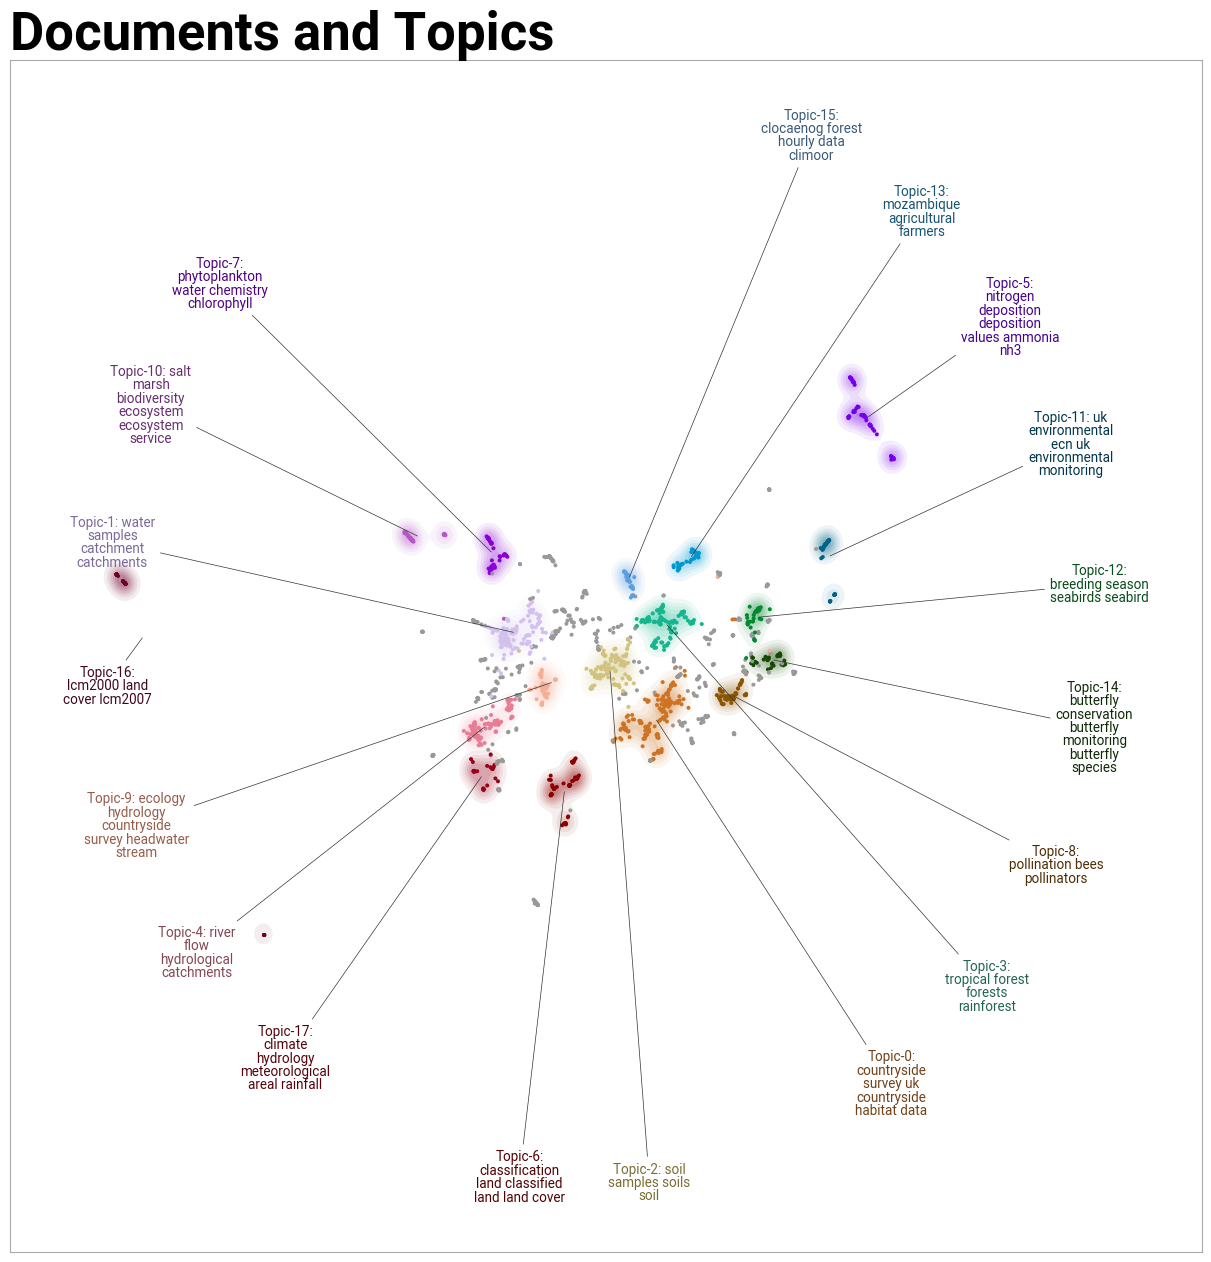

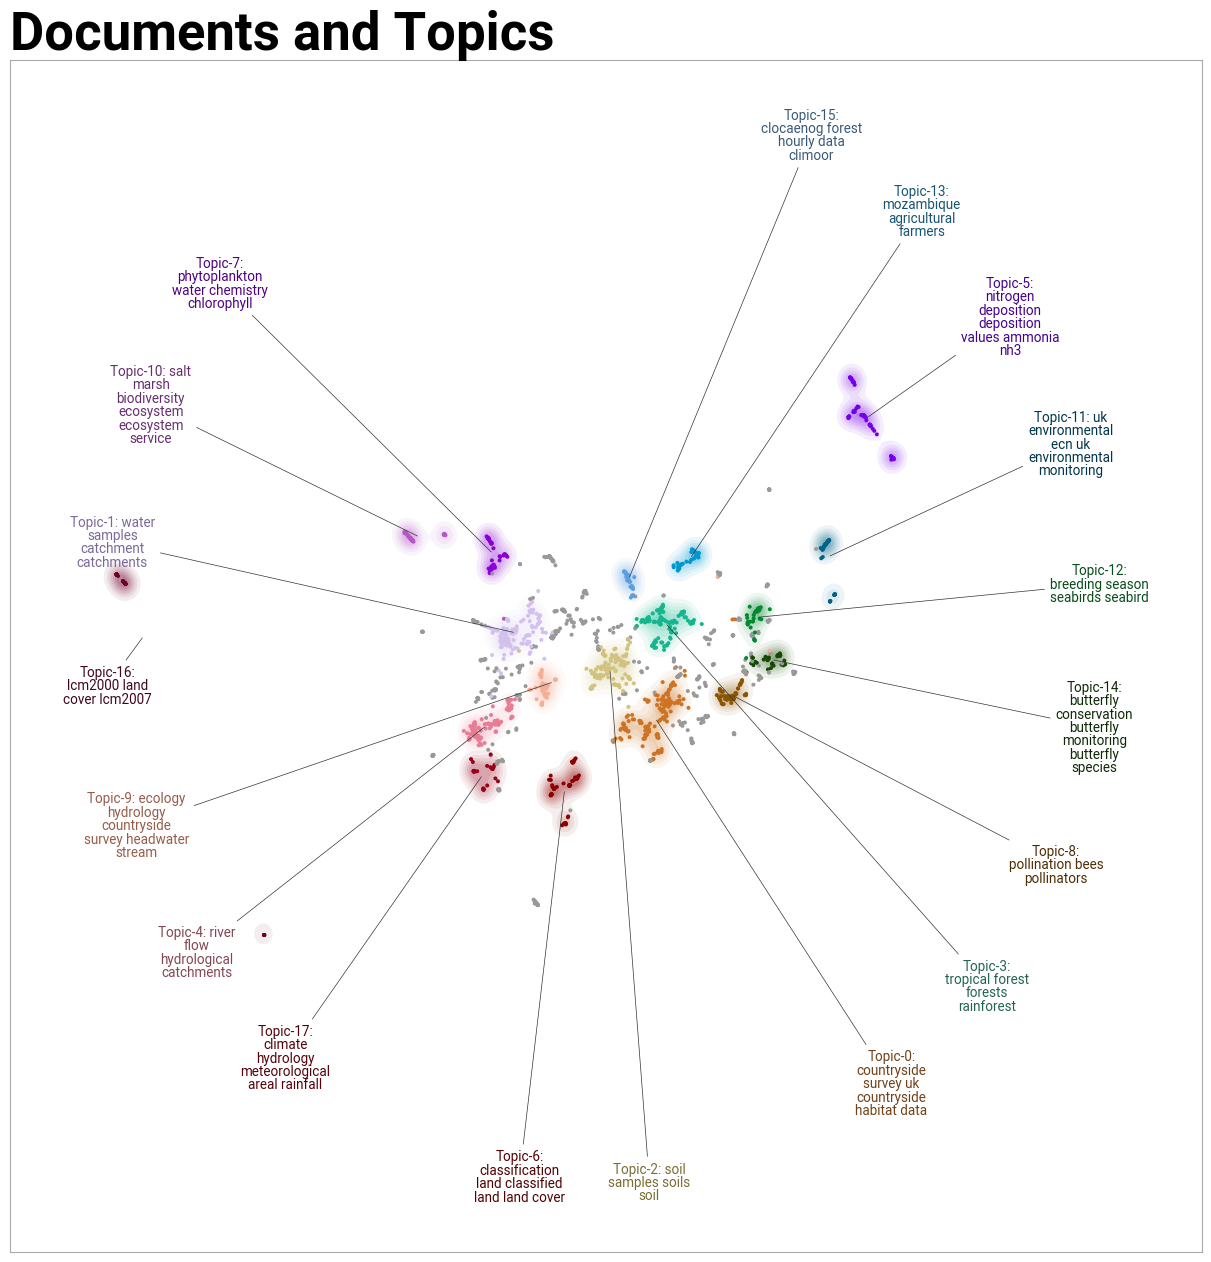

In [7]:
topic_model.visualize_document_datamap(texts, reduced_embeddings=reduced_embeddings)

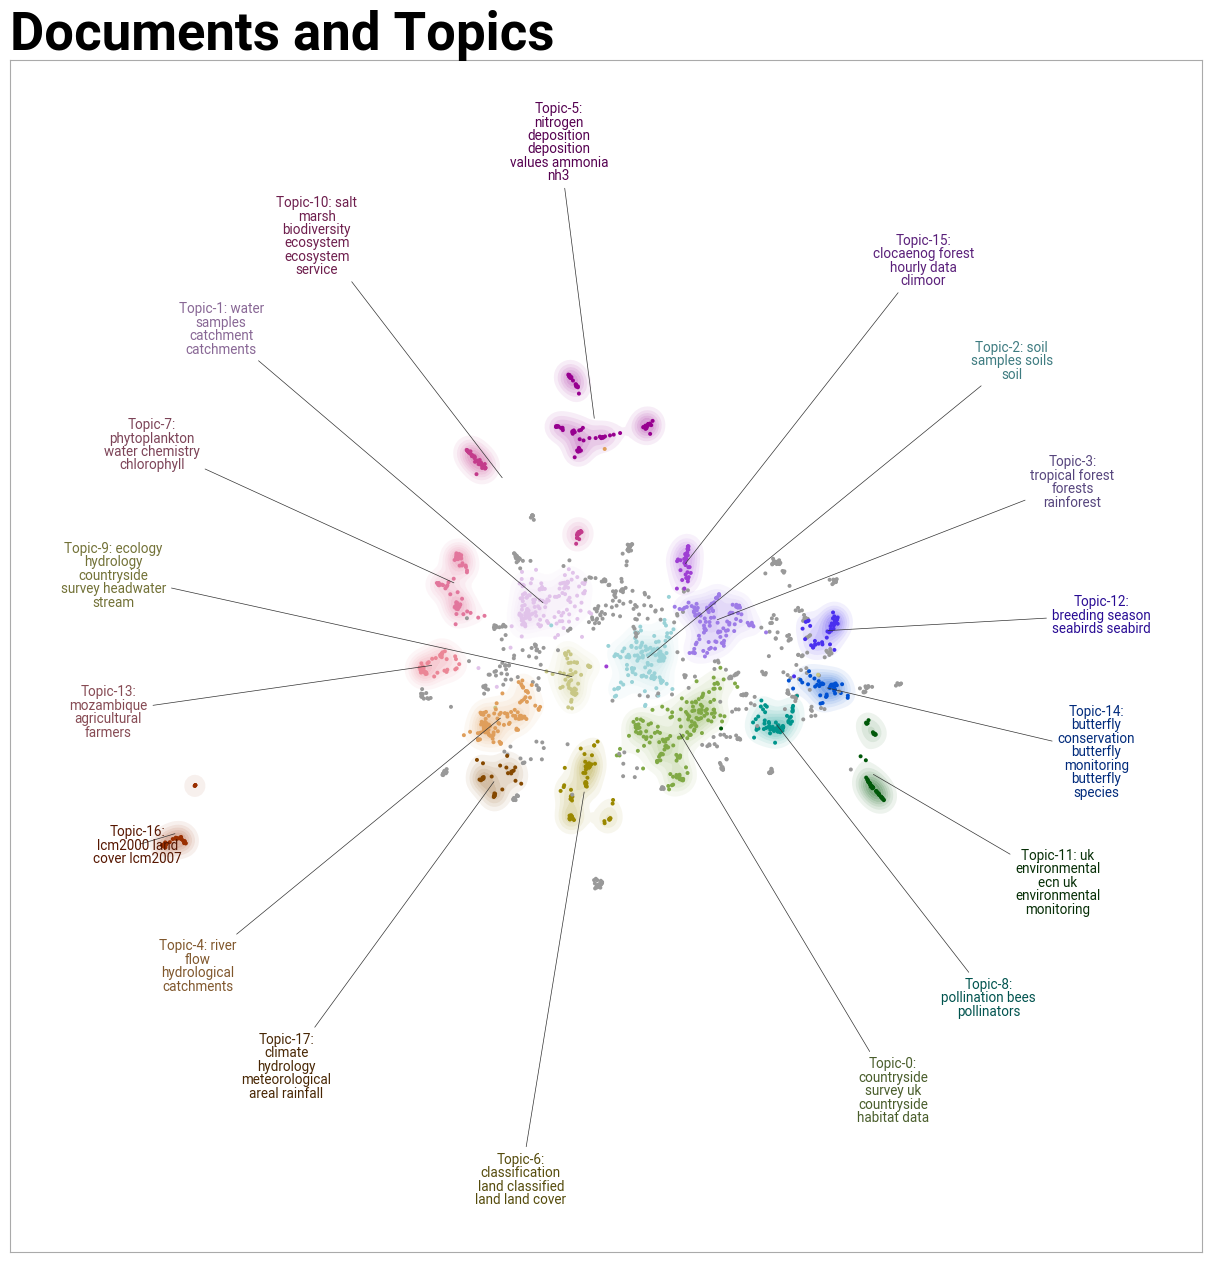

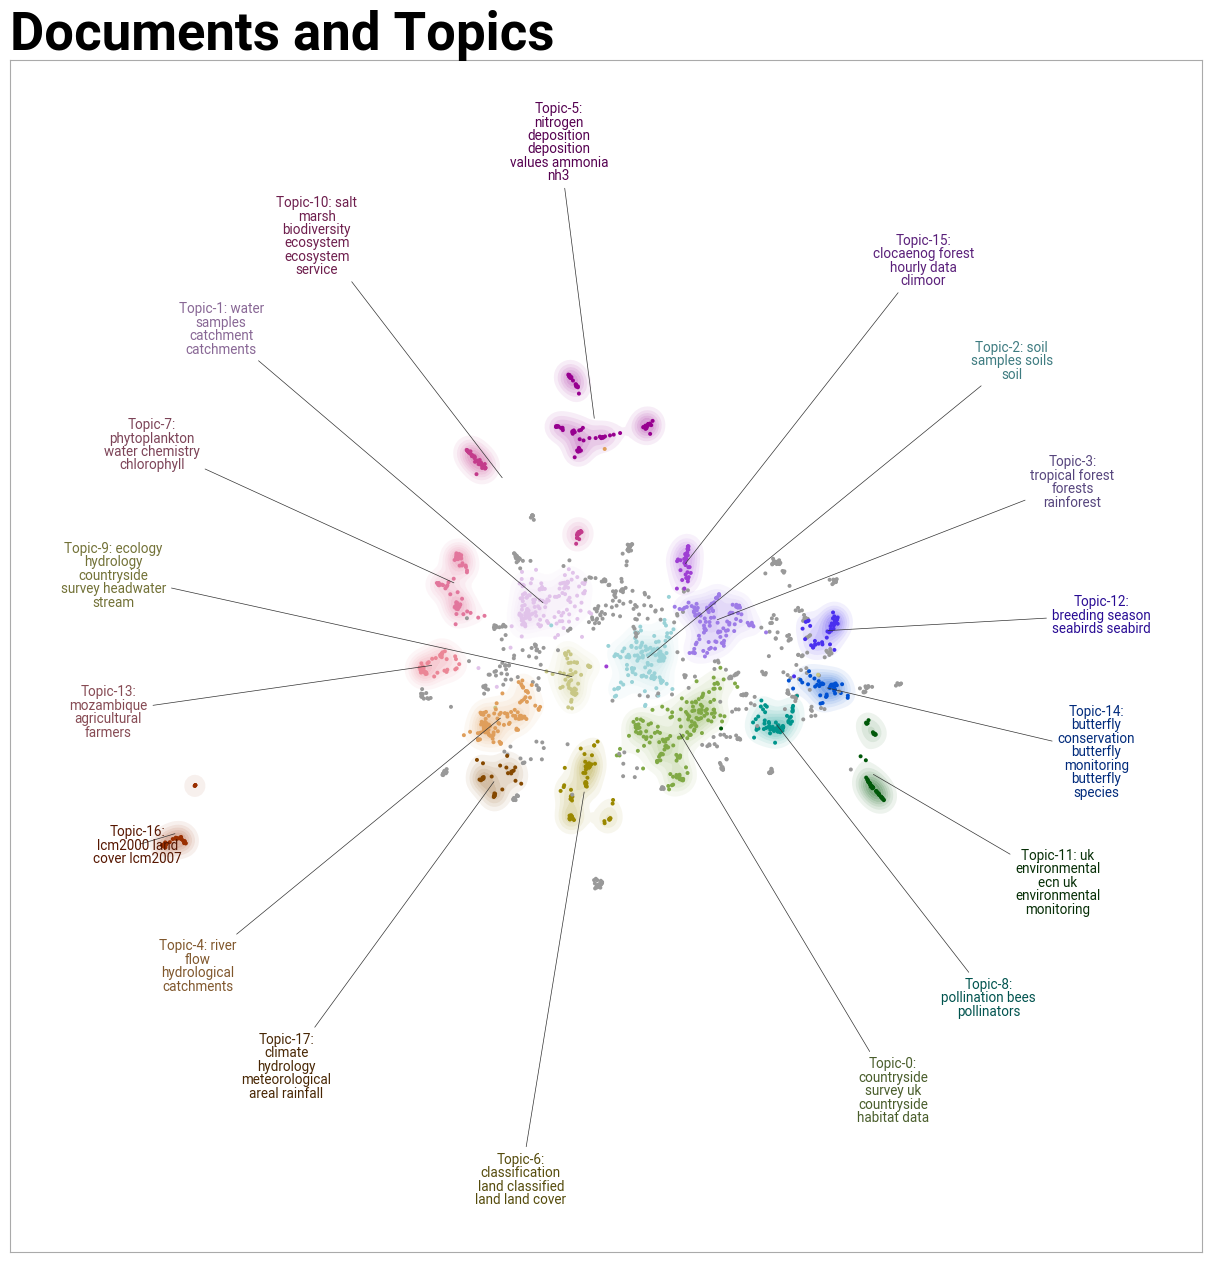

In [8]:
topic_model.visualize_document_datamap(texts, embeddings=embeddings)

In [9]:
topic_model.visualize_barchart()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4668833017349243, 0.5124947428703308, 0.545025646686554,
                    0.6168781518936157, 0.6976462602615356],
              'xaxis': 'x',
              'y': [grassland  , countryside  , habitat data  , uk countryside  ,
                    countryside survey  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4859740138053894, 0.4862130880355835, 0.522254467010498,
                    0.5409697890281677, 0.5865721702575684],
              'xaxis': 'x2',
              'y': [water chemistry  , water quality  , catchments  , catchment  ,
                    water samples  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4601687490940094, 0.47015732526779175, 0.5185770392417908,
                    0.5236619710922241, 0.6159202456474304],
              'xaxis': 'x3',
              'y': [soil cores  , grassland  , soil  , soils  , soil samples  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4960694909095764, 0.5163700580596924, 0.5259759426116943,
                    0.5269113779067993, 0.6068782806396484],
              'xaxis': 'x4',
              'y': [forest  , vegetation  , rainforest  , forests  , tropical
                    forest  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.3546357750892639, 0.45399174094200134, 0.4604087471961975,
                    0.4659290909767151, 0.5023826956748962],
              'xaxis': 'x5',
              'y': [1km grid  , catchment  , catchments  , hydrological  , river
                    flow  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.3438225984573364, 0.35701900720596313, 0.35875260829925537,
                    0.3696770668029785, 0.4561910033226013],
              'xaxis': 'x6',
              'y': [concentrations  , pollutants  , ammonia nh3  , deposition
                    values  , nitrogen deposition  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.47423940896987915, 0.5775260925292969, 0.5808910131454468,
                    0.5833749771118164, 0.6499183773994446],
              'xaxis': 'x7',
              'y': [uk biodiversity  , land surface  , land cover  , classified
                    land  , classification land  ],
              'yaxis': 'y7'},
             {'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.423296183347702, 0.4380680322647095, 0.47491711378097534,
                    0.49204421043395996, 0.5193472504615784],
              'xaxis': 'x8',
              'y': [freshwater ecology  , oxygen water  , chlorophyll  , water
                    chemistry  , phytoplankton  ],
              'yaxis': 'y8'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                     